<a href="https://colab.research.google.com/github/AchiengMary/female_health_models/blob/main/EDA_all_data_sets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [ ]:
#Load data
df_cyst = pd.read_csv("ovarian_cyst_data.csv")
df_inventory = pd.read_csv("resources_inventory_data.csv")
df_treatment = pd.read_csv("treatment_cost_data.csv")

OVARIAN CYST DATA OVERVIEW
<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 7 to 78
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Patient ID                 100 non-null    object        
 1   Age                        100 non-null    int64         
 2   Menopause Status           100 non-null    object        
 3   Cyst Size cm               100 non-null    float64       
 4   Cyst Growth Rate cm/month  100 non-null    float64       
 5   CA 125 Level               100 non-null    int64         
 6   Ultrasound Features        100 non-null    object        
 7   Reported Symptoms          100 non-null    object        
 8   Recommended Management     100 non-null    object        
 9   Date of Exam               100 non-null    object        
 10  Region                     100 non-null    object        
 11  date of exam               100 non-null    datetim

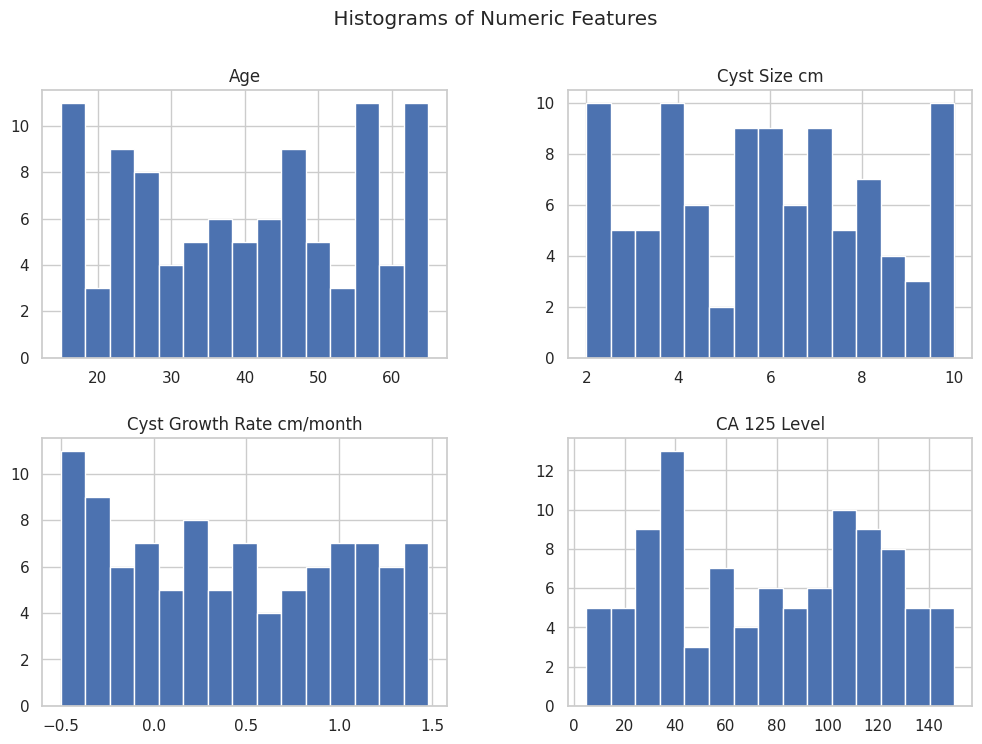

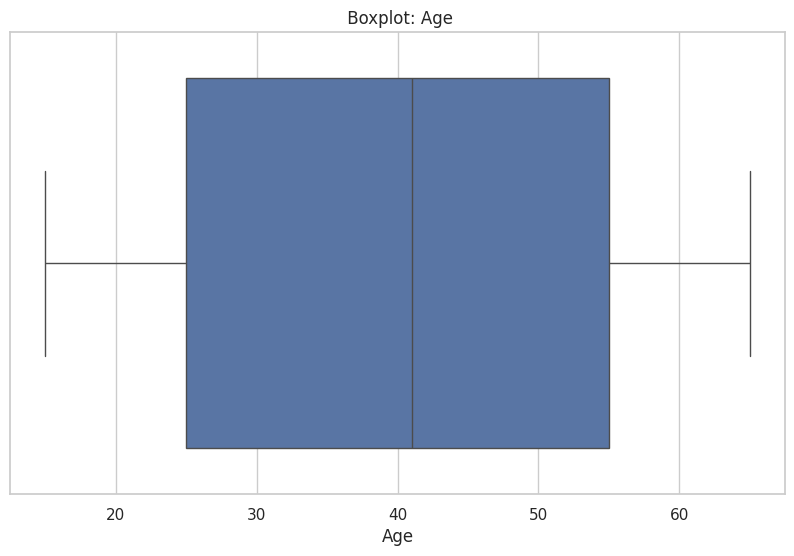

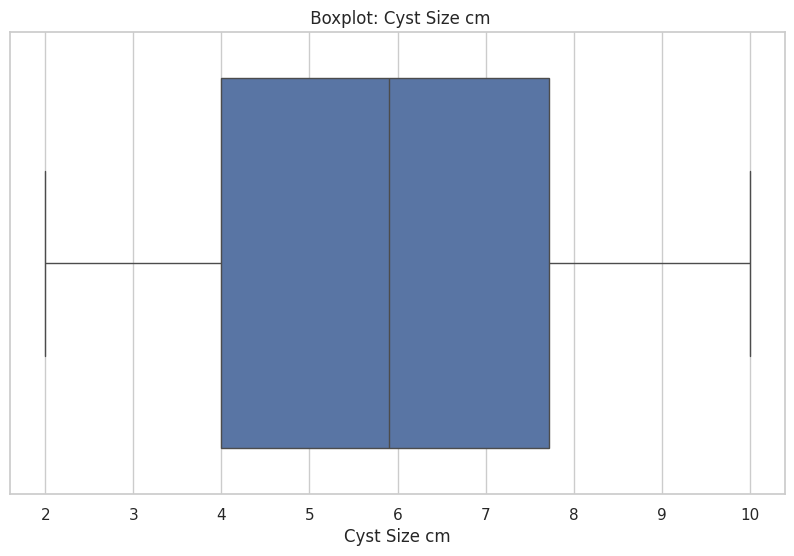

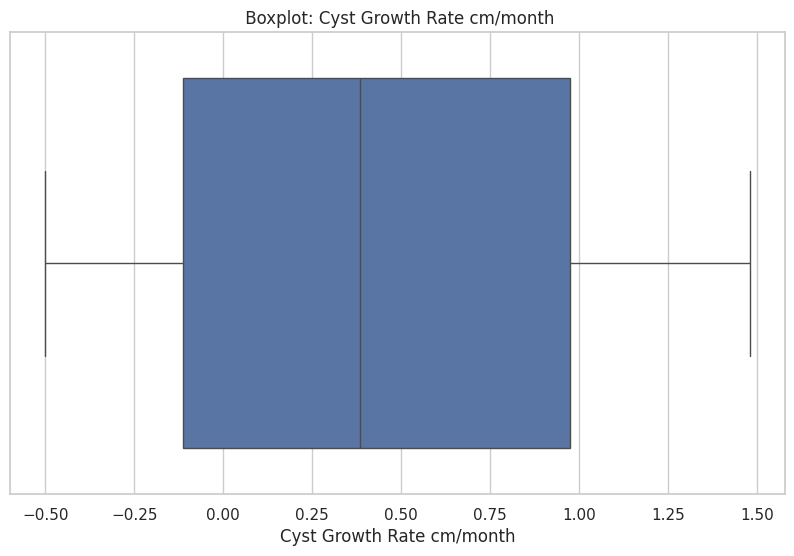

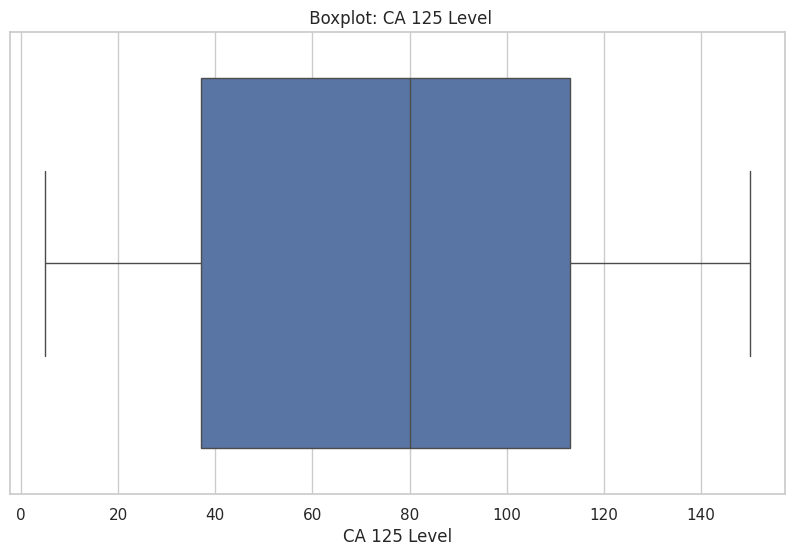

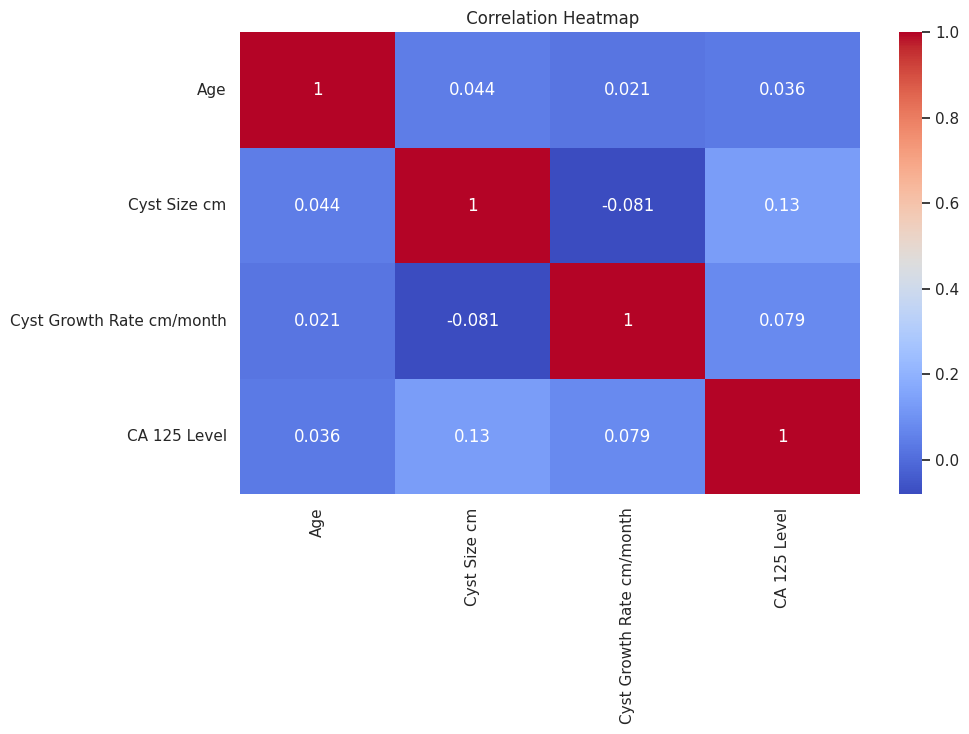

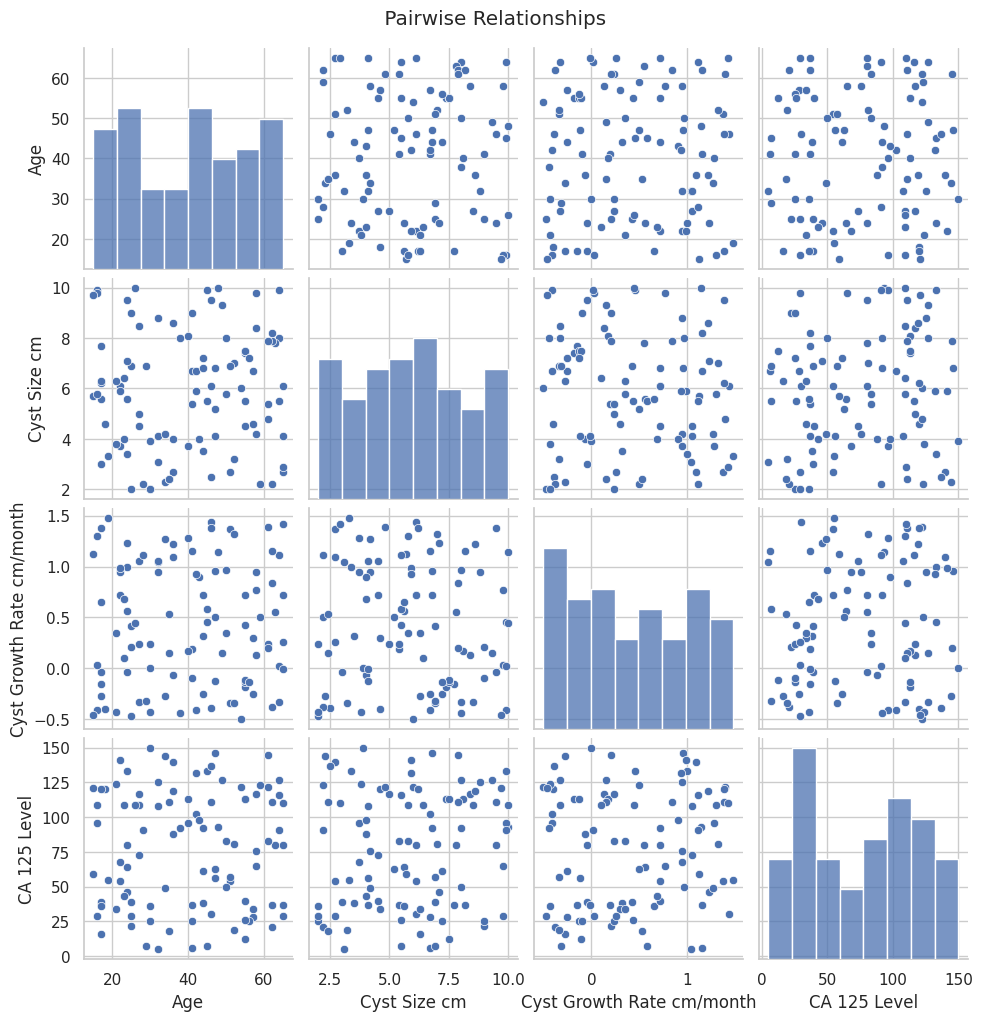

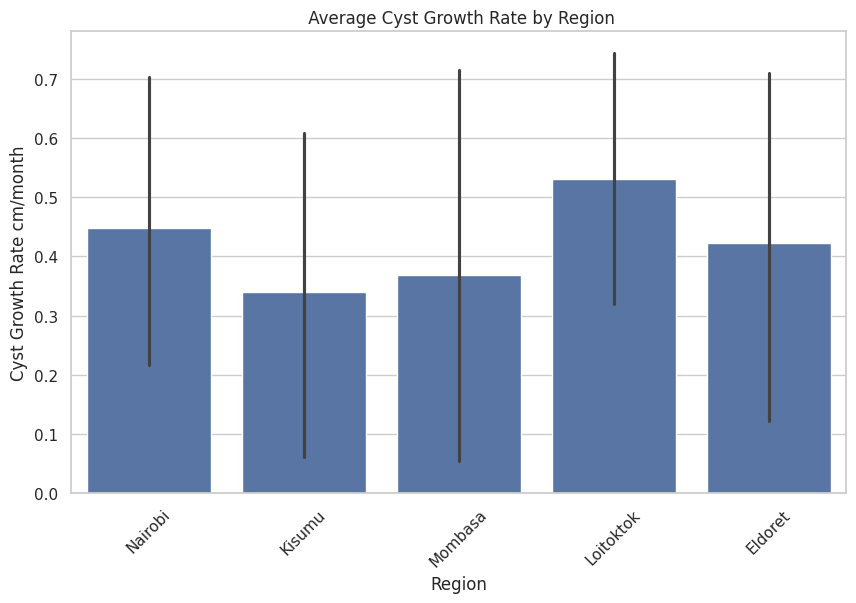

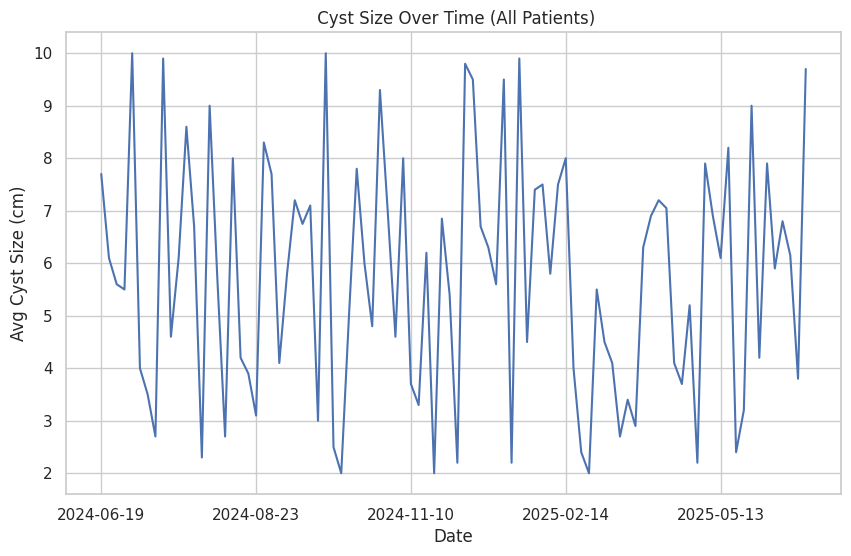

In [ ]:
#EDA for ovarian cysts data
print("OVARIAN CYST DATA OVERVIEW")
print(df_cyst.info())
print(df_cyst.describe())

# Nulls
print("Missing Values:\n", df_cyst.isnull().sum())

# Value Counts
print("\n Menopause Status Distribution:\n", df_cyst["Menopause Status"].value_counts())
print("\n Recommended Management:\n", df_cyst["Recommended Management"].value_counts())

# Convert date
df_cyst["date of exam"] = pd.to_datetime(df_cyst["Date of Exam"], errors='coerce')

# Histograms
num_cols = ["Age", "Cyst Size cm", "Cyst Growth Rate cm/month", "CA 125 Level"]
df_cyst[num_cols].hist(bins=15, figsize=(12, 8))
plt.suptitle(" Histograms of Numeric Features")
plt.show()

# Boxplots
for col in num_cols:
    sns.boxplot(x=df_cyst[col])
    plt.title(f" Boxplot: {col}")
    plt.show()

# Correlation Heatmap
corr = df_cyst[num_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title(" Correlation Heatmap")
plt.show()

# Pairplot
sns.pairplot(df_cyst[num_cols])
plt.suptitle(" Pairwise Relationships", y=1.02)
plt.show()

# Growth Rate by Region
sns.barplot(data=df_cyst, x="Region", y="Cyst Growth Rate cm/month")
plt.title(" Average Cyst Growth Rate by Region")
plt.xticks(rotation=45)
plt.show()

# Time trend
df_cyst.sort_values("Date of Exam", inplace=True)
df_cyst.groupby("Date of Exam")["Cyst Size cm"].mean().plot()
plt.title(" Cyst Size Over Time (All Patients)")
plt.ylabel("Avg Cyst Size (cm)")
plt.xlabel("Date")
plt.show()

RESOURCES INVENTORY DATA OVERVIEW
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Facility         100 non-null    object 
 1   Region           100 non-null    object 
 2   Category         100 non-null    object 
 3   Item             100 non-null    object 
 4   Cost (KES)       100 non-null    float64
 5   Available Stock  100 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB
None
        Cost (KES)  Available Stock
count   100.000000       100.000000
mean   2403.885500        48.590000
std    1457.698177        32.043246
min     127.060000         0.000000
25%    1046.687500        20.750000
50%    2374.295000        44.000000
75%    3677.995000        77.750000
max    4935.750000       100.000000

Missing Values:
 Facility           0
Region             0
Category           0
Item               0
Co

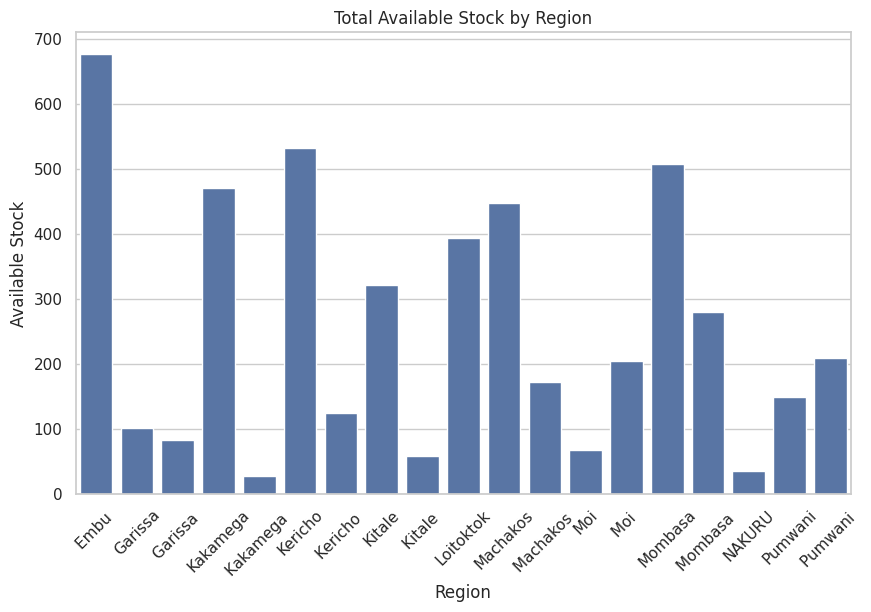

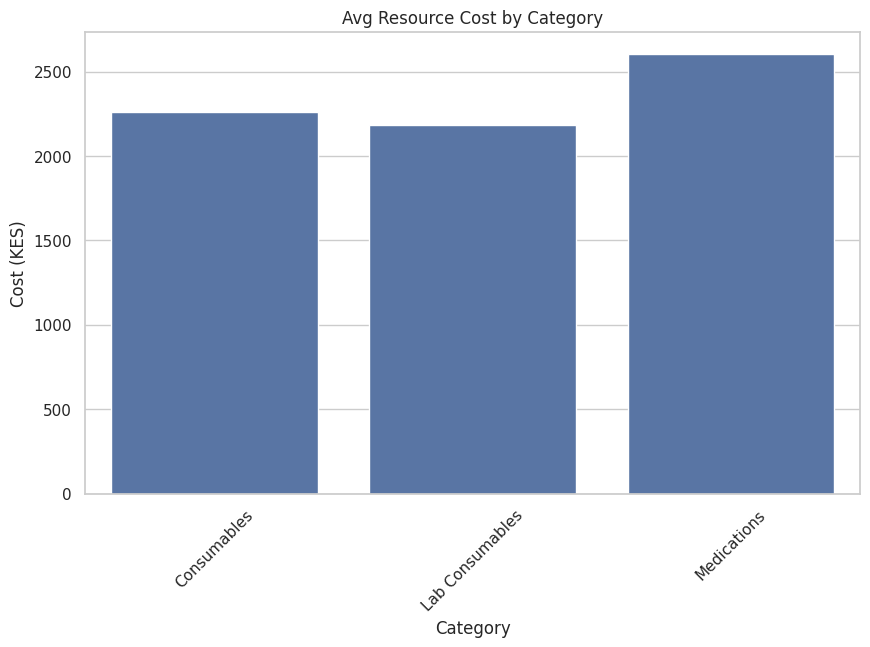

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


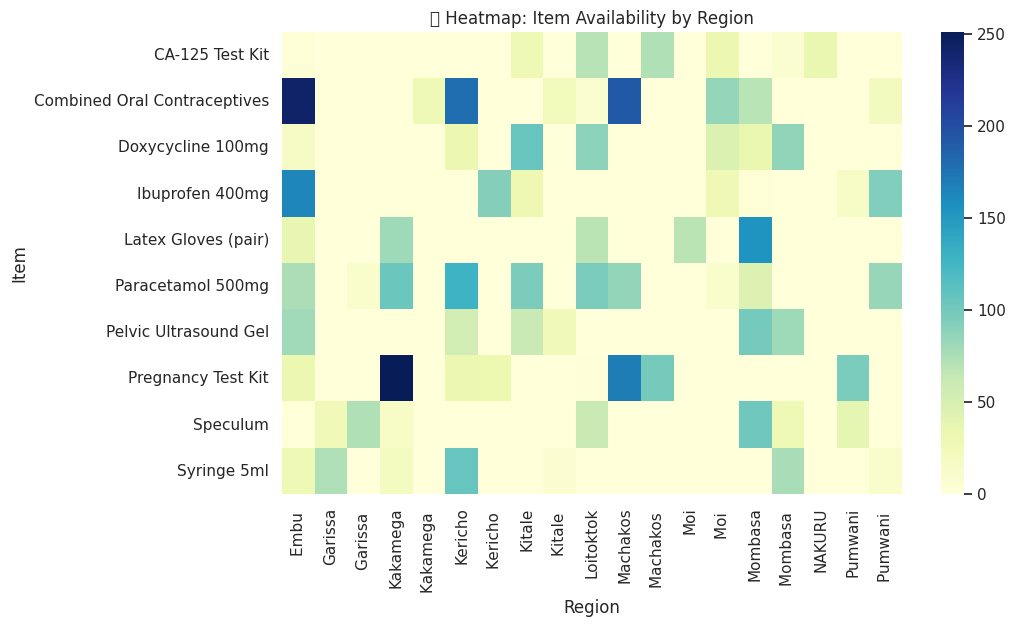

In [ ]:
#EDA for resources inventory data
print("RESOURCES INVENTORY DATA OVERVIEW")
print(df_inventory.info())
print(df_inventory.describe())
print("\nMissing Values:\n", df_inventory.isnull().sum())

# Stock per region
sns.barplot(data=df_inventory.groupby("Region")["Available Stock"].sum().reset_index(),
            x="Region", y="Available Stock")
plt.title("Total Available Stock by Region")
plt.xticks(rotation=45)
plt.show()

# Average cost by category
sns.barplot(data=df_inventory.groupby("Category")["Cost (KES)"].mean().reset_index(),
            x="Category", y="Cost (KES)")
plt.title("Avg Resource Cost by Category")
plt.xticks(rotation=45)
plt.show()

# Heatmap of stock by item vs region
pivot = df_inventory.pivot_table(index="Item", columns="Region", values="Available Stock", aggfunc="sum", fill_value=0)
sns.heatmap(pivot, cmap="YlGnBu")
plt.title("🔎 Heatmap: Item Availability by Region")
plt.show()

TREATMENT COST DATA OVERVIEW
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Facility               100 non-null    object 
 1   Region                 100 non-null    object 
 2   Category               100 non-null    object 
 3   Service                100 non-null    object 
 4   Base Cost (KES)        100 non-null    float64
 5   NHIF Covered           100 non-null    object 
 6   Insurance Copay (KES)  100 non-null    float64
 7   Out-of-Pocket (KES)    100 non-null    float64
dtypes: float64(3), object(5)
memory usage: 6.4+ KB
None
       Base Cost (KES)  Insurance Copay (KES)  Out-of-Pocket (KES)
count       100.000000             100.000000           100.000000
mean       9742.292000            1630.779400          8111.512600
std        5819.813947            2203.665221          5297.572773
min         598.700000 

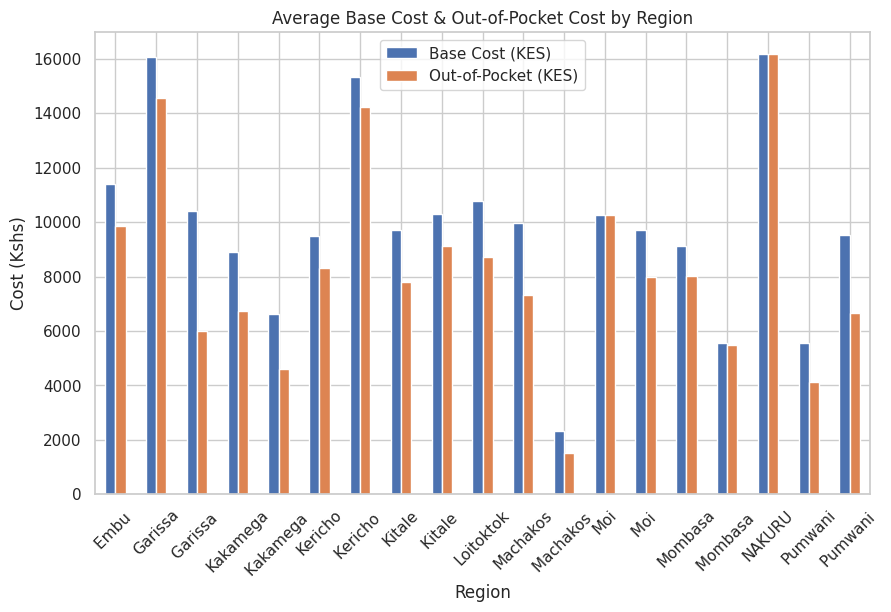

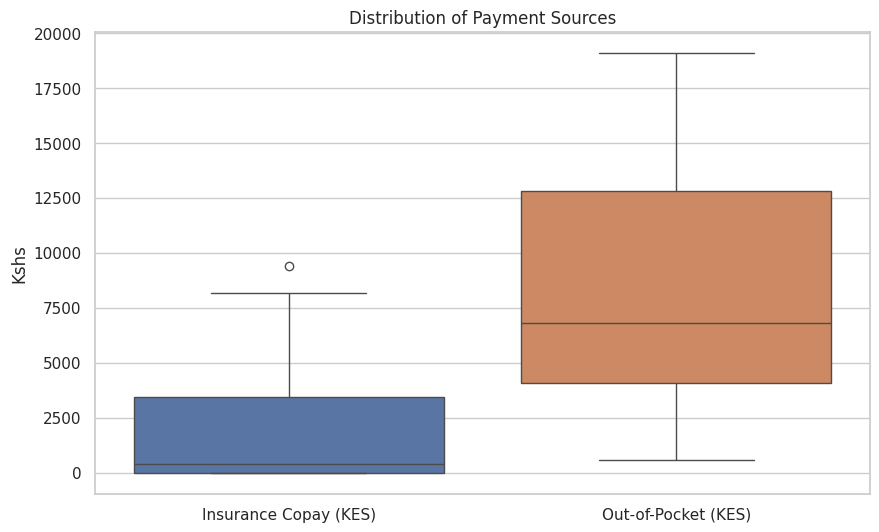

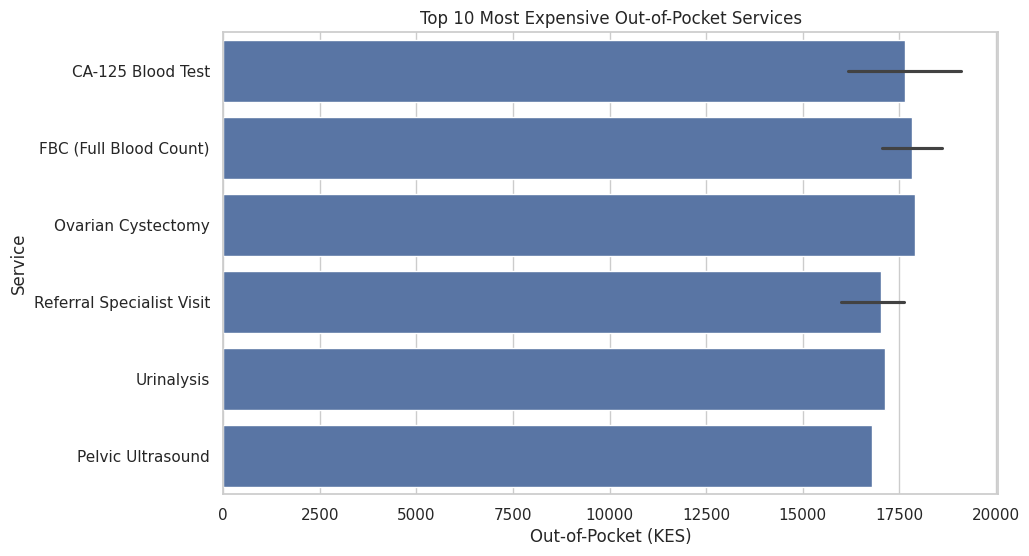

In [ ]:
# EDA for treatment cost data
print("TREATMENT COST DATA OVERVIEW")
print(df_treatment.info())
print(df_treatment.describe())
print("\nMissing Values:\n", df_treatment.isnull().sum())

# Mean costs by region
df_treatment_grouped = df_treatment.groupby("Region")[["Base Cost (KES)", "Out-of-Pocket (KES)"]].mean().reset_index()
df_treatment_grouped.plot(kind="bar", x="Region")
plt.title("Average Base Cost & Out-of-Pocket Cost by Region")
plt.ylabel("Cost (Kshs)")
plt.xticks(rotation=45)
plt.show()

# Compare payment breakdown
sns.boxplot(data=df_treatment[["NHIF Covered", "Insurance Copay (KES)", "Out-of-Pocket (KES)"]])
plt.title("Distribution of Payment Sources")
plt.ylabel("Kshs")
plt.show()

# Service cost comparison
sns.barplot(data=df_treatment.sort_values("Out-of-Pocket (KES)", ascending=False).head(10),
            x="Out-of-Pocket (KES)", y="Service")
plt.title("Top 10 Most Expensive Out-of-Pocket Services")
plt.show()

In [ ]:
#Cyst data model

ordinal_map = {"Pre-menopausal": 0, "Post-menopausal": 1}
df_cyst["Menopause Status"] = df_cyst["Menopause Status"].map(ordinal_map)

# Use One-Hot Encoding for nominal categorical features
df_model = pd.get_dummies(df_cyst,
                          columns=["Ultrasound Features",
                                   "Reported Symptoms", "Region"],
                          drop_first=True)  # Drop first to avoid dummy variable trap

In [ ]:
# Static case, date is therefore not relevant to the prediction
df_model = df_model.drop(columns=["date of exam"])

In [ ]:
from sklearn.preprocessing import StandardScaler

num_cols = ["Age", "Cyst Size cm", "CA 125 Level"]
scaler = StandardScaler()
df_model[num_cols] = scaler.fit_transform(df_model[num_cols])

In [ ]:
# Save the scaler for future transformation
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df_model.drop(columns=["Patient ID", "Cyst Growth Rate cm/month", "Recommended Management", "Date of Exam", "date of exam"])
y = df_model["Cyst Growth Rate cm/month"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.impute import SimpleImputer

# Impute missing values in X_train and X_test
imputer = SimpleImputer(strategy='most_frequent')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


# Define candidate models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42)
}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train_imputed, y_train)
    preds = model.predict(X_test_imputed)

    print(f"\n🧪 {name}")
    print("MAE:", mean_absolute_error(y_test, preds))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, preds)))
    print("R²:", r2_score(y_test, preds))

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Menopause Status']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Menopause Status']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(



🧪 Linear Regression
MAE: 0.7650467974442823
RMSE: 0.8466978389889459
R²: -0.5016259065476734

🧪 Random Forest
MAE: 0.6710799999999999
RMSE: 0.7329856021778326
R²: -0.12537104693201262


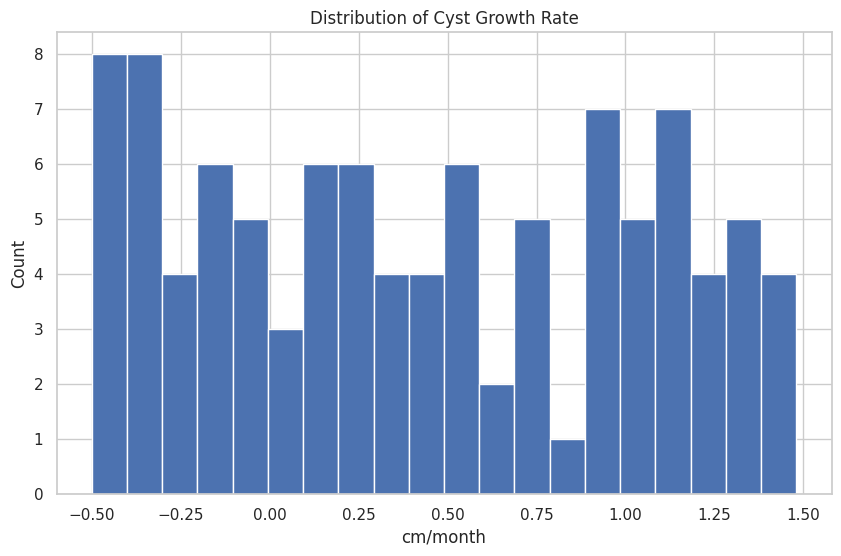

In [ ]:

df_model["Cyst Growth Rate cm/month"].hist(bins=20)
plt.title("Distribution of Cyst Growth Rate")
plt.xlabel("cm/month")
plt.ylabel("Count")
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Random Forest
cv_scores = cross_val_score(RandomForestRegressor(random_state=42),
                            X, y,
                            scoring="neg_mean_squared_error",
                            cv=5)

cv_rmse = np.sqrt(-cv_scores)
print("Cross-Validated RMSE:", cv_rmse)
print("Mean CV RMSE:", cv_rmse.mean())

Cross-Validated RMSE: [0.68464799 0.67049828 0.78038538 0.6443046  0.64429187]
Mean CV RMSE: 0.6848256254364168


This performance is stable across folds, which suggests the model is not overfitting badly — but it's also not very strong.

An average error of ~0.69 cm/month is moderate, depending on how fast cysts grow (e.g., if most grow <1 cm/month, this is large).



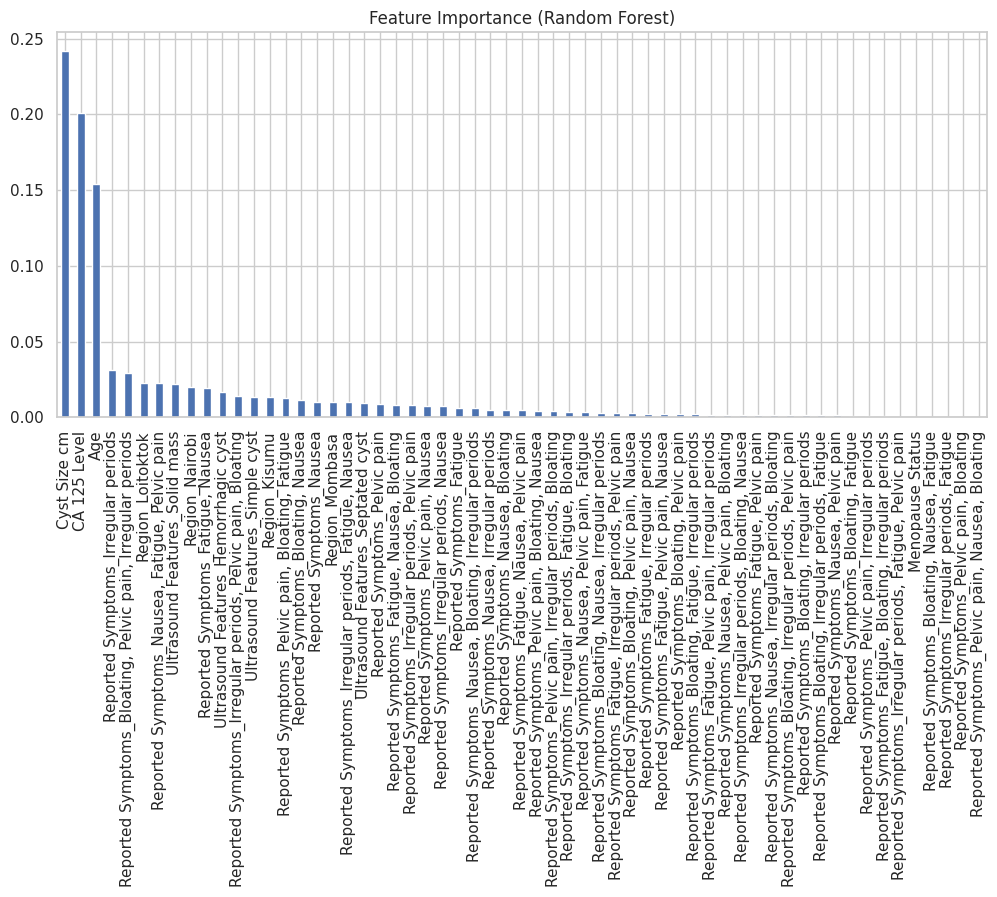

In [ ]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(12, 5))
plt.title("Feature Importance (Random Forest)")
plt.show()